In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Generate data

In [2]:
SEED = 1234
NUM_SAMPLES = 50

In [4]:
# Set seed for reproducibility
np.random.seed(seed=SEED)

In [6]:
# Generate syntetic data
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10, 20, size=num_samples)
    y = 3.5*X + random_noise # add some noise
    return X, y

In [13]:
# Generate random (linear) data
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print (data[:5])

[[ 0.         19.3711646 ]
 [ 1.         19.93696739]
 [ 2.         15.83045764]
 [ 3.         28.414596  ]
 [ 4.         25.74369859]]


In [19]:
# Load into a pandas DataFrame
df = pd.DataFrame(data=data, columns=["x", "y"])
X = df[['x']].values
y = df[['y']].values
df.head()

,x,y
0,0.0,19.371165
1,1.0,19.936967
2,2.0,15.830458
3,3.0,28.414596
4,4.0,25.743699


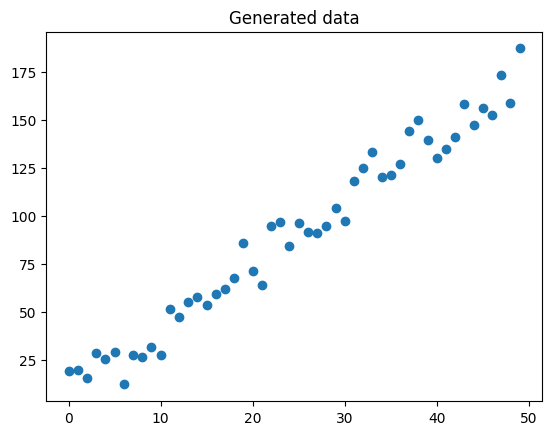

In [21]:
# Scatter plot
plt.title('Generated data')
plt.scatter(x=df['x'], y=df['y'])
plt.show()

### Numpy

Split data

In [22]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [29]:
#  shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [34]:
# Split indices
train_start = 0
train_end = int(TRAIN_SIZE*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [35]:
# split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


Standardize data

In [37]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [40]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [42]:
# standardize 
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [43]:
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: 0.6, std: 0.8
mean: 0.7, std: 1.0


Weights

In [46]:
INPUT_DIM = X_train.shape[1] # X is 1-dimentional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [50]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, 1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


Model

In [54]:
# Forward pass [NX1] · [1X1] = [NX1]
y_pred = np.dot(X_train, W) + b
print(f"y_pred: {y_pred.shape}")

y_pred: (35, 1)
